<a href="https://colab.research.google.com/github/chocobearz/covid-imaging-hackaton/blob/master/Removing_duplicates_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHAT THIS SCRIPT DOES:
(1) cleans metadata dataframe
(2) adds a "PC1" and a "PC2" column to our metadata dataframe

In [1]:
import pandas as pd
df1 = pd.read_csv('https://raw.githubusercontent.com/chocobearz/covid-imaging-hackaton/master/metadata.csv')

In [2]:
df1['patientid'].nunique()

387

In [3]:
df1s = df1.drop_duplicates(subset="patientid", keep="last")

In [4]:
print(df1s['sex'].count())
print(df1s['age'].count())
print(df1s['finding'].count())
df1s = df1s.dropna(subset=['sex','age'])
#df1s = df1s.dropna(subset=['sex', 'age','survival','intubated','location'])
df1s=df1s[df1s['finding']=='COVID-19']
df1s.head()

348
295
387


,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
3,2,6,M,65.0,COVID-19,Y,N,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
5,4,5,F,52.0,COVID-19,NaN,N,N,N,N,...,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
20,11,0,M,56.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,2020,"Sunnybrook Health Sciences Centre, Toronto, On...",images,1-s2.0-S0140673620303706-fx1_lrg.jpg,10.1016/S0140-6736(20)30370-6,https://www.sciencedirect.com/science/article/...,NaN,A 56-year-old man presented to our Emergency D...,NaN,NaN
21,12,7,M,42.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 1, 2020","Tongji Medical College, Wuhan, Hubei Province,...",images,nCoV-radiol.2020200269.fig1-day7.jpeg,10.1148/radiol.2020200269,https://pubs.rsna.org/doi/10.1148/radiol.20202...,NaN,"On January 1, 2020, a 42-year-old man was admi...",NaN,NaN
28,13,10,M,35.0,COVID-19,Y,N,N,N,N,...,"January 26, 2020","Snohomish County, Washington, USA",images,nejmoa2001191_f5-L.jpeg,10.1056/NEJMoa2001191,https://www.nejm.org/doi/full/10.1056/NEJMoa20...,NaN,"On January 19, 2020, a 35-year-old man present...",NaN,NaN


In [5]:
df = df1s[['patientid','sex','age','survival','intubated','location']]

df.sex[df['sex']=='M'] = 1
df.sex[df['sex']=='F'] = 0

df.survival[df['survival']=='Y'] = 2
df.survival[df['survival']=='N'] = 1
df.survival[df['survival'].isna()] = 0

df.intubated[df['intubated']=='Y'] = 2
df.intubated[df['intubated']=='N'] = 1
df.intubated[df['intubated'].isna()] = 0
'''
one_hot = pd.get_dummies(df['location'])
# Drop column B as it is now encoded
df = df.drop('location',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df 
'''
#string.count(substring)
df.location[df['location'].isna()] = 0
df.location[df['location'].str.count("Italy")==1] = 1
df.location[df['location'].str.count("China")==1] = 2
df.location[df['location'].str.count("Vietnam")==1] = 3
df.location[df['location'].str.count("USA")==1] = 4
df.location[df['location'].str.count("Philippines")==1] = 5
df.location[df['location'].str.count("Taiwan")==1] = 6
df.location[df['location'].str.count("Thailand")==1] = 7
df.location[df['location'].str.count("United Kingdom")==1] = 8
df.location[df['location'].str.count("South Korea")==1] = 9
df.location[df['location'].str.count("Colombia")==1] = 10

df.location[df['location'].str.count("Spain")==1] = 11
df.location[df['location'].str.count("Austria")==1] = 12
df.location[df['location'].str.count("Canada")==1] = 13
df.location[df['location'].str.count("Australia")==1] = 14
df.location[df['location'].str.count("Belgium")==1] = 15
df.location[df['location'].str.count("Turkey")==1] = 16
df.location[df['location'].str.count("Iran")==1] = 17
df.location[df['location'].str.count("Ukraine")==1] = 18
df.location[df['location'].str.count("Israel")==1] = 19
df.location[df['location'].str.count("Pakistan")==1] = 20
df.location[df['location'].str.count("Portugal")==1] = 21
df.location[df['location'].str.count("Greece")==1] = 22
df.location[df['location'].str.count("Singapore")==1] = 23
df.location[df['location'].str.count("Japan")==1] = 24
df.location[df['location'].str.count("German")==1] = 25
df.location[df['location'].str.count("Hong Kong")==1] = 26

df.head()

/Users/nadiablostein/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nadiablostein/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/nadiablostein/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,patientid,sex,age,survival,intubated,location
3,2,1,65.0,2,1,3
5,4,0,52.0,0,1,6
20,11,1,56.0,2,0,13
21,12,1,42.0,2,0,2
28,13,1,35.0,2,1,4


In [6]:
df2 = df[['sex','age','survival','intubated','location']]

In [7]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array(df2)
print(X.shape)
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) # eigenvalues
print(pca.components_) # our two eigen vectors

(198, 5)
[0.85949607 0.13586365]
[[-2.39303187e-04 -9.99558088e-01  2.73413889e-03 -5.34210523e-04
   2.95940960e-02]
 [-8.47021733e-03  2.95607321e-02 -1.12590164e-02  3.10029736e-03
   9.99458874e-01]]


In [8]:
print(pca.components_[0])
PC1 = np.array(np.dot(X,pca.components_[0]))
print(PC1.shape)
print(pca.components_[1])
PC2 = np.array(np.dot(X,pca.components_[1]))
print(PC2.shape)

[-2.39303187e-04 -9.99558088e-01  2.73413889e-03 -5.34210523e-04
  2.95940960e-02]
(198,)
[-0.00847022  0.02956073 -0.01125902  0.0031003   0.99945887]
(198,)


In [9]:
df["PC1"] = PC1
df["PC2"] = PC2

/Users/nadiablostein/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nadiablostein/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.head()

,patientid,sex,age,survival,intubated,location,PC1,PC2
3,2,1,65.0,2,1,3,-64.8778,4.89194
5,4,0,52.0,0,1,6,-51.8,7.53701
20,11,1,56.0,2,0,13,-55.5853,14.6174
21,12,1,42.0,2,0,2,-41.917,3.20948
28,13,1,35.0,2,1,4,-34.8615,5.00457


In [11]:
df.shape

(198, 8)

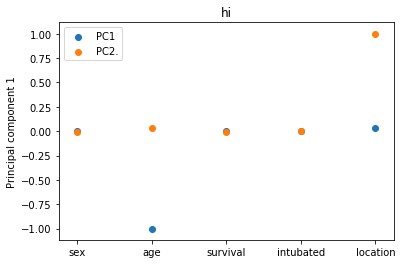

In [20]:
import matplotlib.pyplot as plt

plt.figure()
x_axis = df2.columns
plt.scatter(x_axis,pca.components_[0], label = "PC1")
plt.scatter(x_axis,pca.components_[1],label = "PC2.")
plt.ylabel("Principal component 1")
plt.title("Eigenvector component by feature plot for first two PCs")
plt.legend()
plt.show()